In [3]:
# I found it! - https://fenrir.as.arizona.edu/jwstmock/

# AND here's the documentation - https://fenrir.as.arizona.edu/jwstmock/jades-mock-catalog_v1.2.pdf

# Okay I'm downloading the image mosaics for JADES 

# Deep survey images generated from fiducial mock v1.1 (above) 
# by Christopher Willmer using Guitarra, a ray-tracing image simulator for JWST/NIRCam. 
# These images were created using the same read-out patterns that will be used in flight, 
# and are reduced using the same software that will be applied to the NIRCam data when 
# those become available. The simulated images include a contribution due to zodiacal 
# and telescope background light, cosmic rays, read noise, and the detector signatures 
# as measured from ground-based data. The images are a composite at the depth of the 
# JADES survey, combined using swarp (Bertin et al. 2002 ) using the dither positions 
# calculated by the JWST Astronomer's Proposal Tool for GTO program 1180.



In [ ]:
# Update from an email with Christopher:
# apparently 
'''
Sorry, I gave you incorrect information - the _raw_ images are in ADU,
those reduced by the pipeline should be in e-/sec, so no need to use the
gain.
What will vary with location is the noise level, because of the variable
exposure time.

I am not sure if the images on fenrir are correct in regard to the
background level. When the mosaics are created using astromatic's swarp,
the background is subtracted and I don't know what the (residual) sky
background that one could measure will correspond to. Basically I do not
trust those images when it comes to the photometry.

What I could do is create a mosaic for one of the deep fields in a filter,
(F444W?) turning off the background subtraction when running swarp if you
think that helps. However, I cannot promise a fast turnaround since we
have simulations running on the machine I use to run guitarra.
'''

In [ ]:
# wht extensions are the number of seconds of exposure?
# other ones are total number of electrons?

In [1]:
import astropy.io.fits as pyfits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

(14060, 16160)
SIMPLE  =                    T / This is a FITS file                            
BITPIX  =                  -32 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                16160 / NUMBER OF ELEMENTS ALONG THIS AXIS             
NAXIS2  =                14060 / NUMBER OF ELEMENTS ALONG THIS AXIS             
EXTEND  =                    T / This file may contain FITS extensions          
EQUINOX =        2000.00000000 / Mean equinox                                   
MJD-OBS =   5.835600000000E+04 / Modified Julian date at start                  
RADESYS = 'ICRS    '           / Astrometric system                             
CTYPE1  = 'RA---TAN'           / WCS projection type for this axis              
CUNIT1  = 'deg     '           / Axis unit                                      
CRVAL1  =   5.316468333333E+01 / World coordinate on this axis                  
CRPIX1  =   9

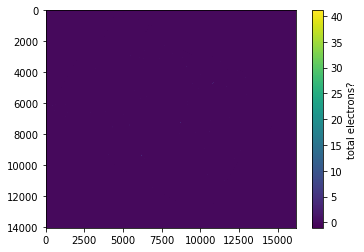

In [10]:
# Looking at the exposure map from Christopher Willmer:
expmap = pyfits.open('goods_s/goods_s_f115w.fits')
                     #gto_f410_expmap.fits')

print(np.shape(expmap[0].data))
print(repr(expmap[0].header))

plt.clf()
plt.imshow(expmap[0].data)
plt.colorbar(label='total electrons?')
plt.show()

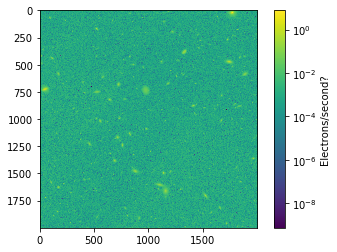

[[ 1.7604750e-03  1.3419753e-04  7.6642675e-05 ... -2.2266752e-03
  -1.5241051e-03  9.8396814e-04]
 [ 4.1964922e-05  5.9954263e-04 -1.3366141e-03 ...  4.1857027e-04
  -2.1108761e-03 -1.2425734e-03]
 [ 9.1634551e-04  5.0750788e-04 -7.7236467e-04 ...  1.5970918e-03
  -2.4528094e-03 -2.9914826e-03]
 ...
 [-1.4113052e-03 -1.0923110e-03 -1.0496547e-03 ... -5.8604789e-04
   1.5253751e-03 -3.2490832e-04]
 [-1.2558708e-03 -1.1911371e-03 -2.8073245e-03 ... -2.4108591e-03
   7.2803826e-04  2.8556269e-03]
 [-9.1614376e-04  4.9164612e-04 -1.4702522e-03 ...  4.3281820e-05
  -8.2231319e-04 -1.3852002e-03]]


In [16]:
plt.clf()
plt.imshow(abs(expmap[0].data[6000:8000,6000:8000]), norm=matplotlib.colors.LogNorm())
plt.colorbar(label='Electrons/second?')
plt.show()
print(expmap[0].data[6000:8000,6000:8000])
# So these are super small numbers, which makes me think they are electrons/second
# Also, the background given above is about 1.615479000000E-01 or 0.1 electrons/s/pix which seems about right?

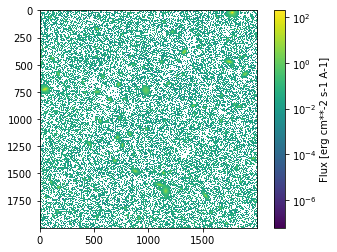

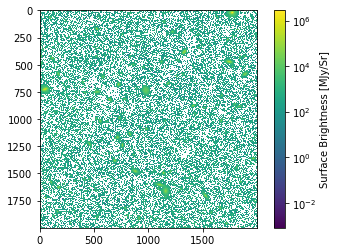

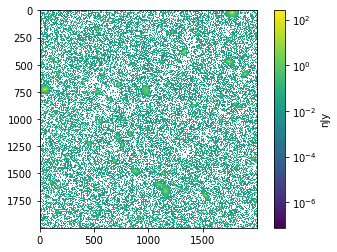

In [28]:
# Now, try to get this into other units?

Flux = expmap[0].header['PHOTFLAM']*expmap[0].data

SB = expmap[0].header['PHOTMJSR']*expmap[0].data

nJy = (expmap[0].data * 10**(0.4*(8.9-expmap[0].header['ABMAG']))*1e9)

plt.imshow(Flux[6000:8000,6000:8000], norm=matplotlib.colors.LogNorm())
plt.colorbar(label='Flux [erg cm**-2 s-1 A-1]')
plt.show()

plt.imshow(SB[6000:8000,6000:8000], norm=matplotlib.colors.LogNorm())
plt.colorbar(label='Surface Brightness [MJy/Sr]')
plt.show()

plt.imshow(nJy[6000:8000,6000:8000], norm=matplotlib.colors.LogNorm())
plt.colorbar(label='nJy')
plt.show()

<Figure size 432x288 with 0 Axes>

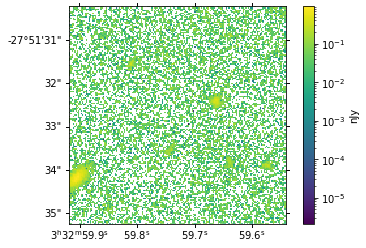

In [30]:
# try to get WCS to make a cutout - 
from astropy.wcs import WCS
from astropy import units as u
from astropy.nddata import Cutout2D

wcs = WCS(expmap[0].header)


size = u.Quantity((5,5), u.arcsec)



position = (6000,7500)
cutout = Cutout2D(nJy, position, size, wcs=wcs)

plt.clf()
fig = plt.figure()
fig.add_subplot(111, projection=wcs)
plt.imshow(cutout.data, norm=matplotlib.colors.LogNorm())
plt.colorbar(label='nJy')
plt.show()

In [4]:
filterN_wht = pyfits.open('goods_s/goods_s_F115W_wht.fits')
print(repr(filterN_wht[0].header))

SIMPLE  =                    T / This is a FITS file                            
BITPIX  =                  -32 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                16160 / NUMBER OF ELEMENTS ALONG THIS AXIS             
NAXIS2  =                14060 / NUMBER OF ELEMENTS ALONG THIS AXIS             
EXTEND  =                    T / This file may contain FITS extensions          
EQUINOX =        2000.00000000 / Mean equinox                                   
MJD-OBS =   5.835600000000E+04 / Modified Julian date at start                  
RADESYS = 'ICRS    '           / Astrometric system                             
CTYPE1  = 'RA---TAN'           / WCS projection type for this axis              
CUNIT1  = 'deg     '           / Axis unit                                      
CRVAL1  =   5.316468333333E+01 / World coordinate on this axis                  
CRPIX1  =   9.016000000000E+

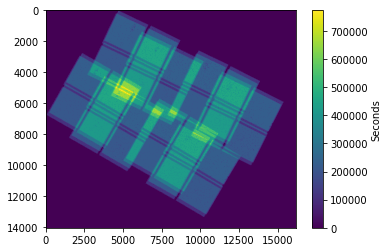

In [5]:
plt.clf()
plt.imshow(filterN_wht[0].data)
plt.colorbar(label='Seconds')
plt.show()

In [6]:
filterN = pyfits.open('goods_s/goods_s_F115W.fits')
data = filterN[0].data#/filterN_wht[0].data

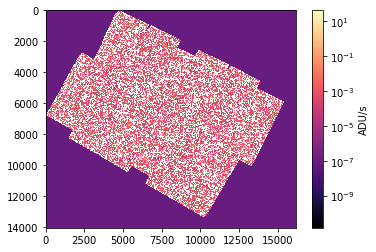

In [7]:
plt.clf()
plt.imshow(data, norm=matplotlib.colors.LogNorm(), cmap='magma')
plt.colorbar(label = 'ADU/s')
plt.show()

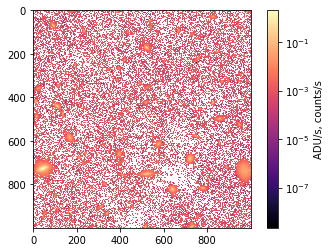

In [8]:
plt.clf()
plt.imshow(data[6000:7000,6000:7000], norm=matplotlib.colors.LogNorm(), cmap='magma')
plt.colorbar(label = 'ADU/s, counts/s')
plt.show()

In [9]:
print(np.shape(filterN[0].data))
print(repr(filterN[0].header))


(14060, 16160)
SIMPLE  =                    T / This is a FITS file                            
BITPIX  =                  -32 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                16160 / NUMBER OF ELEMENTS ALONG THIS AXIS             
NAXIS2  =                14060 / NUMBER OF ELEMENTS ALONG THIS AXIS             
EXTEND  =                    T / This file may contain FITS extensions          
EQUINOX =        2000.00000000 / Mean equinox                                   
MJD-OBS =   5.835600000000E+04 / Modified Julian date at start                  
RADESYS = 'ICRS    '           / Astrometric system                             
CTYPE1  = 'RA---TAN'           / WCS projection type for this axis              
CUNIT1  = 'deg     '           / Axis unit                                      
CRVAL1  =   5.316468333333E+01 / World coordinate on this axis                  
CRPIX1  =   9

gain, e-/ADU 154.7190779092


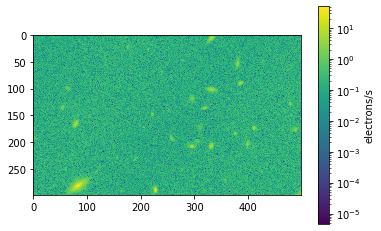

In [10]:
masked = np.ma.masked_where(data==0, data)*filterN[0].header['GAIN']

print('gain, e-/ADU', filterN[0].header['GAIN'])

plt.clf()
plt.imshow(abs(masked[6200:6500,5000:5500]), norm=matplotlib.colors.LogNorm())
plt.colorbar(label='electrons/s')
plt.show()



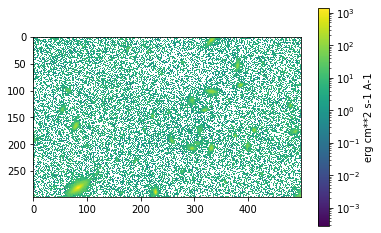

In [11]:
flam = filterN[0].header['PHOTFLAM']*masked
plt.clf()
plt.imshow(flam[6200:6500,5000:5500], norm=matplotlib.colors.LogNorm())
plt.colorbar(label='erg cm**2 s-1 A-1')
plt.show()



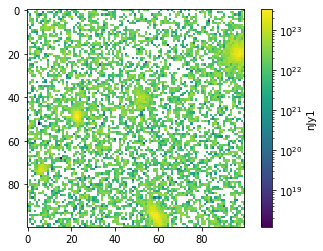

ABMAG zeropoint 27.5681
Jansky zeropoint 3.4100441353975697e-08


NameError: name 'STOP' is not defined

In [12]:

Jy = 3.34e4*filterN[0].header['PHOTPLAM']**2*flam
nJy = Jy*1e9
plt.clf()
plt.imshow(nJy[6300:6400,5200:5300], norm=matplotlib.colors.LogNorm())
plt.colorbar(label='nJy1')
plt.show()



# Convert to nJy using Sandro's method:
# 10**(0.4*(8.9-abmag))*1e9 = nJy
print('ABMAG zeropoint', filterN[0].header['ABMAG'])
print('Jansky zeropoint', 10**(0.4*(8.9-filterN[0].header['ABMAG'])))
STOP

Jy = (masked * 10**(0.4*(8.9-filterN[0].header['ABMAG'])))
nJy = (masked * 10**(0.4*(8.9-filterN[0].header['ABMAG']))*1e9)
# Okay now convert to ABs
m_AB = -2.5*np.log10(abs(Jy)/3631)

plt.clf()
plt.imshow(nJy[6300:6400,5200:5300], norm=matplotlib.colors.LogNorm())
plt.colorbar(label='nJy')
plt.show()



plt.clf()
plt.imshow(m_AB[6300:6400,5200:5300])#, norm=matplotlib.colors.LogNorm())
plt.colorbar(label='AB mags')
plt.show()


In [ ]:
print(np.shape(nJy[6300:6400,5200:5300]))
plt.clf()
plt.hist(nJy[6300:6400,5200:5300].flatten(), bins=200)
plt.xlabel('nJy')
plt.xlim([-0.2,0.2])
plt.show()


plt.clf()

plt.hist(m_AB[6300:6400,5200:5300].flatten(), bins=200)
plt.xlabel('AB mags')
#plt.xlim([-0.2,0.2])
plt.show()
# Interesting, now it's asymmetric because magnitudes are messed up

In [ ]:
# Try to convert to AB mags
# m_AB = -2.5 log_10 (f_nu/3631 Jy)




print('mean value ABmag/arcsec^2', np.mean(m_AB[6300:6400,5200:5300]), np.std(m_AB[6300:6400,5200:5300]))
nJy_mean = np.mean(nJy[6300:6400,5200:5300])
nJy_std = np.std(nJy[6300:6400,5200:5300])
print('mean value nJy/arcsec^2', nJy_mean, nJy_std, 10*nJy_std)
print('converted back to mags', -2.5*np.log10(abs((nJy_mean*1e-9)/3631)), -2.5*np.log10(abs((nJy_std*1e-9)/3631)),
     -2.5*np.log10(abs((10*nJy_std*1e-9)/3631)))

plt.clf()
plt.imshow(m_AB[6300:6400,5200:5300], vmax = -2.5*np.log10(abs((10*nJy_std*1e-9)/3631)))#, norm=matplotlib.colors.LogNorm())
plt.colorbar(label='AB mags')#/arcsec^2')
plt.show()

# okay if the pixels are 0.063" x 0.063" then if you square this and 

In [ ]:
# Now find out what the spatial axis is  - degrees

from astropy.wcs import WCS

wcs = WCS(F444W[0].header)

plt.clf()
fig = plt.figure()
fig.add_subplot(111, projection=wcs)
plt.imshow(nJy[6200:6300,5000:5100], origin='lower', cmap=plt.cm.viridis, norm=matplotlib.colors.LogNorm())
plt.xlabel('RA')
plt.ylabel('Dec')
plt.colorbar(label='nJy')
plt.show()

In [ ]:
# Find out how to center on something and then 

In [ ]:
F444W.close()